# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(dotenv_path='/Users/tejaspatel/Documents/Unit_5_Homework/api.env')


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $32149.41
The current value of your 5.3 ETH is $8109.85


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-14 04:00:00+00:00,118.58,118.74,118.58,118.67,3986773,14581,118.667215,AGG
2020-07-14 04:00:00+00:00,313.25,319.76,312.00,318.92,93545660,580271,316.244144,SPY


In [9]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

In [10]:
# Get closing prices for SPY and AGG from the last year
df_portfolio_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end,
).df

# Display sample data
df_portfolio_year.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-01-02 05:00:00+00:00,112.68,112.80,112.5600,112.68,6791572,17764,112.645004,AGG
2020-01-03 05:00:00+00:00,112.89,113.05,112.7814,113.01,3664283,14453,112.958798,AGG
2020-01-06 05:00:00+00:00,113.13,113.13,112.8400,112.92,8132811,17278,112.949596,AGG
2020-01-07 05:00:00+00:00,112.92,112.92,112.7800,112.80,2883090,11526,112.834954,AGG
2020-01-08 05:00:00+00:00,112.85,112.94,112.5450,112.67,7323117,12854,112.671650,AGG
2020-01-09 05:00:00+00:00,112.49,112.79,112.4600,112.79,9110852,13407,112.730232,AGG
2020-01-10 05:00:00+00:00,112.90,112.99,112.8200,112.98,4198146,11557,112.924603,AGG
2020-01-13 05:00:00+00:00,112.89,112.94,112.8250,112.91,4465340,19122,112.893617,AGG
2020-01-14 05:00:00+00:00,112.97,113.02,112.9300,113.01,3632828,13471,112.986268,AGG


In [11]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio_year[df_portfolio_year['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio_year[df_portfolio_year['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_year = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio_year.head(10)

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2020-01-02 05:00:00+00:00  112.68  112.80  112.5600  112.68  6791572   
2020-01-03 05:00:00+00:00  112.89  113.05  112.7814  113.01  3664283   
2020-01-06 05:00:00+00:00  113.13  113.13  112.8400  112.92  8132811   
2020-01-07 05:00:00+00:00  112.92  112.92  112.7800  112.80  2883090   
2020-01-08 05:00:00+00:00  112.85  112.94  112.5450  112.67  7323117   
2020-01-09 05:00:00+00:00  112.49  112.79  112.4600  112.79  9110852   
2020-01-10 05:00:00+00:00  112.90  112.99  112.8200  112.98  4198146   
2020-01-13 05:00:00+00:00  112.89  112.94  112.8250  112.91  4465340   
2020-01-14 05:00:00+00:00  112.97  113.02  112.9300  113.01  3632828   
2020-01-15 05:00:00+00:00  113.18  113.19  113.0700  113.18  3896358   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-01-02 05:00:00+00:00       17764  112.645004  323.58  324.89  322.530   
2020-01-03 05:00:00+00:00       14453  112.958798  321.19  323.64  321.100   
2020-01-06 05:00:00+00:00       17278  112.949596  320.44  323.73  320.360   
2020-01-07 05:00:00+00:00       11526  112.834954  323.02  323.54  322.240   
2020-01-08 05:00:00+00:00       12854  112.671650  322.99  325.78  322.670   
2020-01-09 05:00:00+00:00       13407  112.730232  326.20  326.73  325.520   
2020-01-10 05:00:00+00:00       11557  112.924603  327.36  327.46  325.200   
2020-01-13 05:00:00+00:00       19122  112.893617  326.40  327.96  325.920   
2020-01-14 05:00:00+00:00       13471  112.986268  327.48  328.62  326.844   
2020-01-15 05:00:00+00:00       11398  113.155816  327.34  329.02  327.260   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-01-02 05:00:00+00:00  324.87  59291031      304890  323.710733  
2020-01-03 05:00:00+00:00  322.41  77783401      358502  322.791700  
2020-01-06 05:00:00+00:00  323.64  55818808      255768  322.722357  
2020-01-07 05:00:00+00:00  322.73  43415360      226065  322.688238  
2020-01-08 05:00:00+00:00  324.45  68595620      340007  324.323890  
2020-01-09 05:00:00+00:00  326.65  48582719      242163  326.093557  
2020-01-10 05:00:00+00:00  325.71  53105114      236222  326.406834  
2020-01-13 05:00:00+00:00  327.95  47637573      217436  327.275509  
2020-01-14 05:00:00+00:00  327.45  63002816      331315  327.600702  
2020-01-15 05:00:00+00:00  328.19  73270483      293442  328.145177

In [12]:
# Pick AGG and SPY close prices
agg_close_price = AGG.iloc[-1]['close']
spy_close_price = SPY.iloc[-1]['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.19
Current SPY closing price: $373.88


In [13]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18694.00
The current value of your 200 AGG shares is $23638.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto_value = my_btc_value + my_eth_value
my_shares_value = my_spy_value + my_agg_value

assets = ['crypto','shares']

value_data ={
    'amount ($)': [my_crypto_value,my_shares_value]
}


# Create savings DataFrame
df_savings = pd.DataFrame(value_data, index=assets)

# Display savings DataFrame
display(df_savings)

,amount ($)
crypto,40259.257165
shares,42332.000000


<AxesSubplot:title={'center':'Distribution of Savings'}, ylabel='amount ($)'>

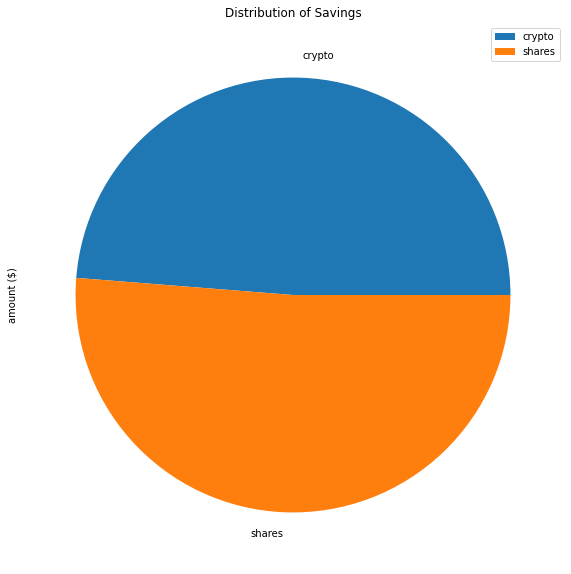

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y='amount ($)', title="Distribution of Savings", figsize=(10,10))

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(value_data['amount ($)'])

print("An ideal emergency fund should be equal to 3 times your monthly income.\n")

print(f"\tSavings goal: ${emergency_fund:,.2f}\n")

# Validate saving health
if total_savings > emergency_fund:
    print(f"\tCongratulations! You are over your goal by ${total_savings - emergency_fund:,.2f}.")
elif total_savings == emergency_fund:
    print("\tCongratulations,you have met your financial goal.")
else:
    print(f"\tYou are ${(emergency_fund - total_savings):,2.f} away from your goal.")

An ideal emergency fund should be equal to 3 times your monthly income.

	Savings goal: $36,000.00

	Congratulations! You are over your goal by $46,591.26.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()


In [41]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_stock_data.dropna(inplace=True)

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [46]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_cum_returns = MCSimulation(
    portfolio_data = df_stock_data.copy(),
    weights = [.5,.5],
    num_simulation = 100,
    num_trading_days = 252*5
)

In [47]:
# Printing the simulation input data
mc_cum_returns.portfolio_data

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.65  3480337   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.3700  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.49  6469432   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   
...                               ...         ...          ...     ...   
2021-04-26 04:00:00+00:00       13521  114.706244    -0.000871  417.42   
2021-04-27 04:00:00+00:00       12720  114.498315    -0.002442  417.97   
2021-04-28 04:00:00+00:00       24303  114.379810     0.000525  417.84   
2021-04-29 04:00:00+00:00       21096  114.250702    -0.000524  420.38   
2021-04-30 04:00:00+00:00       19582  114.456246     0.001049  417.67   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.4100  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.2800  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.4200  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.4700  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.8800  205.70   89131004      340335   
...                           ...       ...     ...        ...         ...   
2021-04-26 04:00:00+00:00  418.22  416.8111  417.61   52076360      295872   
2021-04-27 04:00:00+00:00  418.14  416.3000  417.52   50324187      296302   
2021-04-28 04:00:00+00:00  419.01  416.9000  417.40   50692843      330050   
2021-04-29 04:00:00+00:00  420.72  416.4400  420.06   77056617      443399   
2021-04-30 04:00:00+00:00  418.54  416.3400  417.30   84731942      478844   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659  
...                               ...          ...  
2021-04-26 04:00:00+00:00  417.505200     0.002088  
2021-04-27 04:00:00+00:00  417.481280    -0.000216  
2021-04-28 04:00:00+00:00  417.742098    -0.000287  
2021-04-29 04:00:00+00:00  418.825111     0.006373  
2021-04-30 04:00:00+00:00  417.651995    -0.006570  

[1259 rows x 16 columns]

In [48]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_cum_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001751,1.004836,1.004441,1.001335,0.993133,0.992754,1.000707,1.003573,1.001822,0.993626,...,0.993952,0.996020,1.003753,0.999243,1.006884,0.996805,1.005295,0.994707,0.995110,0.998755
2,1.011511,1.010259,1.001053,1.010711,0.993469,0.996928,1.005181,1.006177,0.990765,0.999806,...,0.994873,0.987913,0.999962,0.998355,1.013893,0.993665,1.008126,0.996780,0.996831,0.999491
3,1.012612,1.012968,0.996823,1.019109,0.999841,1.003654,1.004396,1.010258,0.991967,0.998059,...,0.996740,0.988247,1.002439,1.000453,1.016993,0.995734,1.006325,1.000280,1.002535,1.003627
4,1.009140,1.017322,0.999829,1.014404,1.001416,1.003100,0.998160,1.023552,0.997967,0.994387,...,1.000769,0.992493,1.006489,1.006738,1.019036,0.991224,1.009904,0.998942,1.008502,0.998112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.060767,1.322227,1.457877,1.557978,1.317824,1.955168,1.114913,1.858494,1.473061,1.239001,...,1.510779,1.406884,1.158448,1.363067,1.240732,1.516248,2.665428,1.085268,1.437843,2.015709
1257,1.072105,1.335962,1.479471,1.545240,1.302474,1.945345,1.121189,1.855842,1.485366,1.236367,...,1.517549,1.421468,1.173267,1.347478,1.246531,1.514746,2.626925,1.080113,1.424191,2.008629
1258,1.072498,1.344730,1.465579,1.545123,1.304591,1.971957,1.132491,1.855609,1.500916,1.237826,...,1.521278,1.418091,1.184403,1.355674,1.253189,1.534528,2.652001,1.078540,1.431078,2.012384
1259,1.067651,1.342389,1.475163,1.538741,1.310325,1.956744,1.143267,1.840599,1.502428,1.248986,...,1.525778,1.418851,1.184638,1.362947,1.257399,1.540829,2.649991,1.080518,1.434143,2.016847


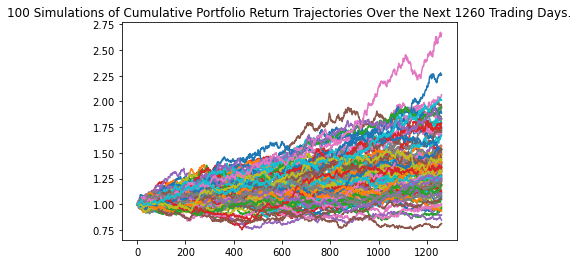

In [49]:
# Plot simulation outcomes
line_plot = mc_cum_returns.plot_simulation()

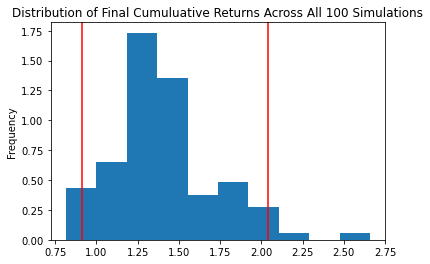

In [50]:
# Plot probability distribution and confidence intervals
dist_plot = mc_cum_returns.plot_distribution()

### Retirement Analysis

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_statistics= mc_cum_returns.summarize_cumulative_return()

# Print summary statistics
print(mc_statistics)

count           100.000000
mean              1.405707
std               0.312220
min               0.813773
25%               1.222524
50%               1.359819
75%               1.533705
max               2.660181
95% CI Lower      0.913311
95% CI Upper      2.039802
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [52]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_statistics[8]*initial_investment,2)
ci_upper = round(mc_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18266.22 and $40796.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [53]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_statistics[8]*initial_investment,2)
ci_upper = round(mc_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $27399.33 and $61194.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns


In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")